In [11]:
# Instalamos librerias que podriamos necesitar
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [35]:
##Librerías

import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree

import joblib  ### para guardar modelos
import openpyxl

In [13]:
#Importamos la base de datos
df_final2 = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/df_final.csv', sep=',')
df_final2

,NRODOC,SEXO,EDAD,YEAR_x,MES_x,QUINQUENIO,YEAR_y,MES_y,REGIMEN AFILIACION,EPS VALIDADA,...,TIPO DIAGNOSTICO PRINCIPAL,PROFESIONAL ESPECIALIDAD,TIEMPO ESTANCIA (DIAS),YEAR,MES,PESO,TALLA,CLASIFICACION IMC,DIAGNOSTICO PRINCIPAL,AMBITO SEGUN EL MEDICO
0,307994,M,89.0,2017,SEPTIEMBRE,85-89,2021,OCTUBRE,Contributivo,NUEVA EPS S.A. PGP,...,Nuevo,Urgentologia,0.0,2017,DICIEMBRE,63.0,162.0,Normal,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Ambulatorio
1,306526,M,79.0,2017,SEPTIEMBRE,75-79,2018,ENERO,Contributivo,NUEVA EPS S.A. PGP,...,Nuevo,Medicina Interna,1.0,2017,OCTUBRE,67.0,153.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Domiciliario
2,307053,M,79.0,2017,SEPTIEMBRE,75-79,2021,OCTUBRE,Contributivo,NUEVA EPS S.A. PGP,...,Nuevo,Medicina Interna,3.0,2017,DICIEMBRE,74.0,158.0,Sobrepeso,E109 - DIABETES MELLITUS INSULINODEPENDIENTE S...,Ambulatorio
3,306688,M,71.0,2017,SEPTIEMBRE,70-74,2018,ENERO,Contributivo,NUEVA EPS S.A. PGP,...,Nuevo,Ortopedia,12.0,2017,NOVIEMBRE,73.0,169.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Ambulatorio
4,306688,M,71.0,2017,SEPTIEMBRE,70-74,2018,ENERO,Contributivo,NUEVA EPS S.A. PGP,...,Nuevo,Ortopedia,12.0,2021,FEBRERO,71.0,169.0,Normal,E108 - DIABETES MELLITUS INSULINODEPENDIENTE C...,Sin dato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,313987,F,68.0,2021,OCTUBRE,65-69,2021,NOVIEMBRE,Contributivo,NUEVA EPS S.A. PGP,...,Nuevo,Medicina Interna,2.0,2021,OCTUBRE,51.5,145.0,Normal,M329 - LUPUS ERITEMATOSO SISTEMICO SIN OTRA ES...,Sin dato
1255,308394,M,60.0,2021,NOVIEMBRE,60-64,2021,AGOSTO,Contributivo,NUEVA EPS S.A. PGP,...,Nuevo,Urologia,0.0,2021,FEBRERO,62.0,162.0,Normal,G820 - PARAPLEJIA FLACIDA,Sin dato
1256,306827,M,60.0,2022,FEBRERO,60-64,2021,ABRIL,Contributivo,NUEVA EPS S.A. PGP,...,Nuevo,Medicina Interna,4.0,2018,SEPTIEMBRE,80.0,174.0,Sobrepeso,SIN INFORMACION,Sin dato
1257,306827,M,60.0,2022,FEBRERO,60-64,2021,ABRIL,Contributivo,NUEVA EPS S.A. PGP,...,Nuevo,Medicina Interna,4.0,2021,FEBRERO,80.0,176.0,Sobrepeso,T913 - SECUELAS DE TRAUMATISMO DE LA MEDULA ES...,Sin dato


In [14]:
#Observar si existen nulos
df_final2.isnull().sum()

NRODOC                           0
SEXO                             0
EDAD                             0
YEAR_x                           0
MES_x                            0
QUINQUENIO                       0
YEAR_y                           0
MES_y                            0
REGIMEN AFILIACION               0
EPS VALIDADA                     0
MODALIDAD CONTRATO               0
VIA INGRESO                      0
SERVICIO EGRESO                  0
TIPO EGRESO                      0
FECHA INGRESO CLINICA            0
FECHA INGRESO SERVICIO           0
FECHA SALIDA                     0
DEMORA ASIGNACION CAMA           0
DEMORA APLICACION MEDICAMENTO    0
DEMORA SALIDA CLINICA (DIAS)     0
TRANSFUSION SANGRE               0
ANTIBIOTICO                      0
TIPO DIAGNOSTICO PRINCIPAL       0
PROFESIONAL ESPECIALIDAD         0
TIEMPO ESTANCIA (DIAS)           0
YEAR                             0
MES                              0
PESO                             0
TALLA               

In [15]:
# Borramos las variables que no necesitamos y no aportan al modelo

columnas_a_borrar = ['NRODOC', 'YEAR_x', 'MES_x', 'YEAR_y', 'MES_y', 'REGIMEN AFILIACION', 'EPS VALIDADA', 'MODALIDAD CONTRATO', 'TIPO DIAGNOSTICO PRINCIPAL', 'YEAR', 'MES','QUINQUENIO']

df_final2 = df_final2.drop(columns=columnas_a_borrar)
df_final2.head()

,SEXO,EDAD,VIA INGRESO,SERVICIO EGRESO,TIPO EGRESO,FECHA INGRESO CLINICA,FECHA INGRESO SERVICIO,FECHA SALIDA,DEMORA ASIGNACION CAMA,DEMORA APLICACION MEDICAMENTO,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,PROFESIONAL ESPECIALIDAD,TIEMPO ESTANCIA (DIAS),PESO,TALLA,CLASIFICACION IMC,DIAGNOSTICO PRINCIPAL,AMBITO SEGUN EL MEDICO
0,M,89.0,Urgencias,Camillas SAI Adultos,Fallece,2021-10-25 22:42:15.363,2021-10-26 03:00:15.387,2021-10-26 03:50:21,0.000000,0.02008,0.0,NO,SI,Urgentologia,0.0,63.0,162.0,Normal,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Ambulatorio
1,M,79.0,Urgencias,Camillas SAI Adultos,Remisión a otra institución,2018-01-17 15:23:42.480,2018-01-17 15:23:42.480,2018-01-18 15:43:13,0.000000,0.02008,0.0,NO,NO,Medicina Interna,1.0,67.0,153.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Domiciliario
2,M,79.0,Urgencias,Piso 5 Medicina Interna Sur,Alta Médica,2021-10-21 13:07:56.090,2021-10-23 15:45:37.620,2021-10-27 12:00:50,1.884028,0.02008,0.0,NO,NO,Medicina Interna,3.0,74.0,158.0,Sobrepeso,E109 - DIABETES MELLITUS INSULINODEPENDIENTE S...,Ambulatorio
3,M,71.0,Urgencias,Piso 4 Medicina Interna Sur,Alta Médica,2018-01-09 15:20:08.597,2018-01-13 16:10:21.003,2018-01-26 14:08:53,3.950000,0.02008,0.0,NO,NO,Ortopedia,12.0,73.0,169.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Ambulatorio
4,M,71.0,Urgencias,Piso 4 Medicina Interna Sur,Alta Médica,2018-01-09 15:20:08.597,2018-01-13 16:10:21.003,2018-01-26 14:08:53,3.950000,0.02008,0.0,NO,NO,Ortopedia,12.0,71.0,169.0,Normal,E108 - DIABETES MELLITUS INSULINODEPENDIENTE C...,Sin dato


Convertir a dummies

In [16]:
df_dummies = df_final2.copy()

In [20]:
# Identificamos las columnas categoricas
cat_df_final = df_dummies.select_dtypes(include=['object']).columns

# Crear un listado para almacenar el detalle de las categorías únicas de cada columna
detalle_categorias = []

# Iterar a través de las columnas categóricas y almacenar el detalle de las categorías únicas en el listado
for column in cat_df_final:
    unique_categories = df_dummies[column].unique()
    detalle_categorias.append((column, unique_categories))

# Mostrar el detalle de las categorías únicas
for column, categories in detalle_categorias:
    print(f'Categorías en "{column}":')
    for category in categories:
        print(f'    {category}')


Categorías en "SEXO":
    M
    F
Categorías en "VIA INGRESO":
    Urgencias
    Remitido
    Consulta Externa ó Programada
Categorías en "SERVICIO EGRESO":
    Camillas SAI Adultos
    Piso 5 Medicina Interna Sur
    Piso 4 Medicina Interna Sur
    Piso 8 Medicina Interna Sur
    ERA
    Piso 7 UCI Cardiovascular
    Camillas Sala 2  Urgencias
    Piso 8 Medicina Interna Norte
    Piso 9 Medicina Interna Sur
    Piso 7 Medicina Interna Sur
    Piso 3 Oriente
    Piso 2 Oriente
    Fast track 1
    Camillas Sala 3  Urgencias
    Piso 3
    Piso 6 Medicina Interna Norte
    Piso 5 Medicina Interna Norte
    Piso 6 Medicina Interna Sur
    Piso 7 Medicina Interna Norte
    Camillas Sala 8 Urgencias
    Camillas Sala 7  Urgencias
    Piso 4 Oriente
    Piso 3 Occidente
    Traumas Urgencias
    Camillas Sala 4  Urgencias
    Piso 4 Medicina Interna Norte
    Expansión
    Piso 4 UCI Oriente
    Piso 2 Occidente
    Camillas Sala 5 Urgencias
    Fast track 2
    Piso_10 Medicina Interna
  

In [21]:
list_dummies = cat_df_final.difference(['SEXO','FECHA INGRESO CLINICA','FECHA INGRESO SERVICIO','FECHA SALIDA','SERVICIO EGRESO'])
list_dummies

Index(['AMBITO SEGUN EL MEDICO', 'ANTIBIOTICO', 'CLASIFICACION IMC',
       'DIAGNOSTICO PRINCIPAL', 'PROFESIONAL ESPECIALIDAD', 'TIPO EGRESO',
       'TRANSFUSION SANGRE', 'VIA INGRESO'],
      dtype='object')

In [22]:
# Creamos un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_df_final:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_final = pd.get_dummies(df_dummies)

In [23]:
df_dummies_final.head()

,SEXO,EDAD,DEMORA ASIGNACION CAMA,DEMORA APLICACION MEDICAMENTO,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,TIEMPO ESTANCIA (DIAS),PESO,TALLA,...,DIAGNOSTICO PRINCIPAL_R001 - BRADICARDIA NO ESPECIFICADA,DIAGNOSTICO PRINCIPAL_SIN INFORMACION,DIAGNOSTICO PRINCIPAL_T905 - SECUELAS DE TRAUMATISMO INTRACRANEAL,DIAGNOSTICO PRINCIPAL_T908 - SECUELAS DE OTROS TRAUMATISMOS ESPECIFICADOS DE LA CABEZA,DIAGNOSTICO PRINCIPAL_T913 - SECUELAS DE TRAUMATISMO DE LA MEDULA ESPINAL,DIAGNOSTICO PRINCIPAL_T983 - SECUELAS DE COMPLICACIONES DE LA ATENCION MEDICA Y QUIRURGICA NO CLASIFICADAS EN OTRAS PARTE,DIAGNOSTICO PRINCIPAL_U072 - COVID-19 VIRUS NO IDENTIFICADO,AMBITO SEGUN EL MEDICO_Ambulatorio,AMBITO SEGUN EL MEDICO_Domiciliario,AMBITO SEGUN EL MEDICO_Sin dato
0,1,89.0,0.000000,0.02008,0.0,0,1,0.0,63.0,162.0,...,False,False,False,False,False,False,False,True,False,False
1,1,79.0,0.000000,0.02008,0.0,0,0,1.0,67.0,153.0,...,False,False,False,False,False,False,False,False,True,False
2,1,79.0,1.884028,0.02008,0.0,0,0,3.0,74.0,158.0,...,False,False,False,False,False,False,False,True,False,False
3,1,71.0,3.950000,0.02008,0.0,0,0,12.0,73.0,169.0,...,False,False,False,False,False,False,False,True,False,False
4,1,71.0,3.950000,0.02008,0.0,0,0,12.0,71.0,169.0,...,False,False,False,False,False,False,False,False,False,True


#Escalado y/o estandarización de los datos

In [25]:
######## con base en los modelos candidatos se realizará una selección de variables ########
y = df_dummies_final['TIEMPO ESTANCIA (DIAS)']
X1 = df_dummies_final.loc[:, ~df_dummies_final.columns.isin(['TIEMPO ESTANCIA (DIAS)'])]
scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

#Árbol de decisión

|--- PROFESIONAL ESPECIALIDAD_Cirugia Plastica- Maxilofacial y de la Mano <= 7.89
|   |--- FECHA INGRESO SERVICIO_2021-02-19 20:56:24.373 <= 12.52
|   |   |--- TRANSFUSION SANGRE <= 1.51
|   |   |   |--- value: [3.69]
|   |   |--- TRANSFUSION SANGRE >  1.51
|   |   |   |--- value: [7.83]
|   |--- FECHA INGRESO SERVICIO_2021-02-19 20:56:24.373 >  12.52
|   |   |--- value: [34.00]
|--- PROFESIONAL ESPECIALIDAD_Cirugia Plastica- Maxilofacial y de la Mano >  7.89
|   |--- FECHA INGRESO CLINICA_2018-01-14 14:20:18.567 <= 17.72
|   |   |--- DEMORA ASIGNACION CAMA <= 0.16
|   |   |   |--- value: [59.00]
|   |   |--- DEMORA ASIGNACION CAMA >  0.16
|   |   |   |--- value: [36.33]
|   |--- FECHA INGRESO CLINICA_2018-01-14 14:20:18.567 >  17.72
|   |   |--- value: [3.00]



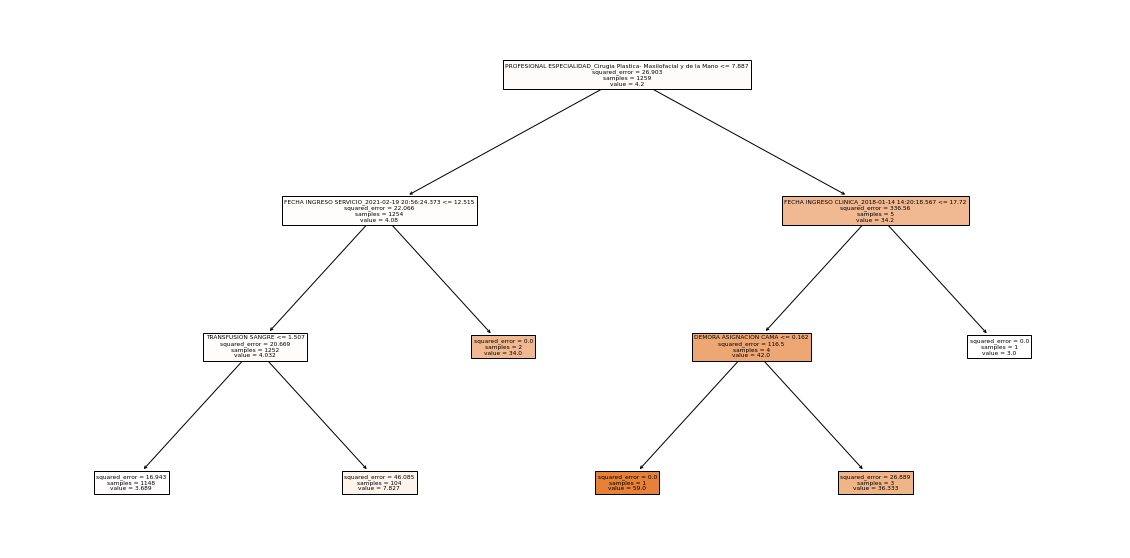

In [36]:
# Crear y entrenar el modelo de árbol de decisión para regresión
rtree = DecisionTreeRegressor(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

#Modelos candidatos